In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import os


In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
data_path = '../An toàn và bảo mật thông tin/data/SQLiV3.csv'

### Reading and displaying the dataset

In [4]:
df = pd.read_csv(data_path, encoding='utf-8')
df.head(10)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN
6,select * from users where id = 1 +$+ or 1 =...,1,NaN,NaN
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,NaN,NaN
8,select * from users where id = '1' or ||/1 ...,1,NaN,NaN
9,select * from users where id = '1' or \.<\ ...,1,NaN,NaN


### Removing unused columns

In [5]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [6]:
df.shape

(30919, 2)

In [7]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [8]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30904 non-null  object
 1   Label     30664 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB
----------------------------------------------------


In [9]:
df['Label'].describe()

count     30664
unique       42
top           0
freq      19268
Name: Label, dtype: object

#### Process NaN values

In [10]:
df['Label'].isna().sum() # Count NaN label values.

255

In [11]:
df = df.dropna() # Remove Nan values.

### Fixing the target label

In [12]:
# Get unique values existing in the label column.

unique_label = pd.unique(df['Label'])
print(unique_label)

['1' 'SELECT *' ' --' ' desc users' ' OR' "waitfor delay '0:0:__TIME__'--"
 ' drop table temp --' '0' ' grant resource to name'
 ' EXEC SelectAllCustomers'
 ' /*Select all the columns of all the records in the Customers table:*/'
 '*/' ' CREATE VIEW [Products Above Average Price] AS'
 ' CREATE OR REPLACE VIEW view_name AS' ' DROP TABLE Suppliers'
 ' CREATE PROCEDURE SelectAllCustomers AS' '  EXEC SelectAllCustomers'
 " DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'"
 ' CREATE OR REPLACE VIEW [Brazil Customers] AS'
 '  SELECT * FROM CustomersLIMIT 3' 'SELECT * FROM Customers'
 ' SELECT TOP 50 PERCENT * FROM Customers'
 ' SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY'
 'SELECT TOP 3 * FROM Customers' ' SELECT * FROM Customers'
 'SELECT SUM ( Quantity ) ' ' SELECT column_name ( s ) '
 ' SELECT City FROM Customers']



#### Above, we can see that the label contains more than simply 0s and 1s. We need to fix the errors it includes.

In [13]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.

In [14]:
df['Label'] = df['Label'].astype('int') # Convert the label type to integer.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 597.8+ KB


In [16]:
df[df['Label'] == 1].count() # Count how much label are 1.

Sentence    11341
Label       11341
dtype: int64

In [17]:
df[df['Label'] == 0].count() # Count how much label are 0.

Sentence    19268
Label       19268
dtype: int64

In [18]:
file_path = 'clean_data.csv'
df.to_csv(file_path, index=False)

### Distribution of the label

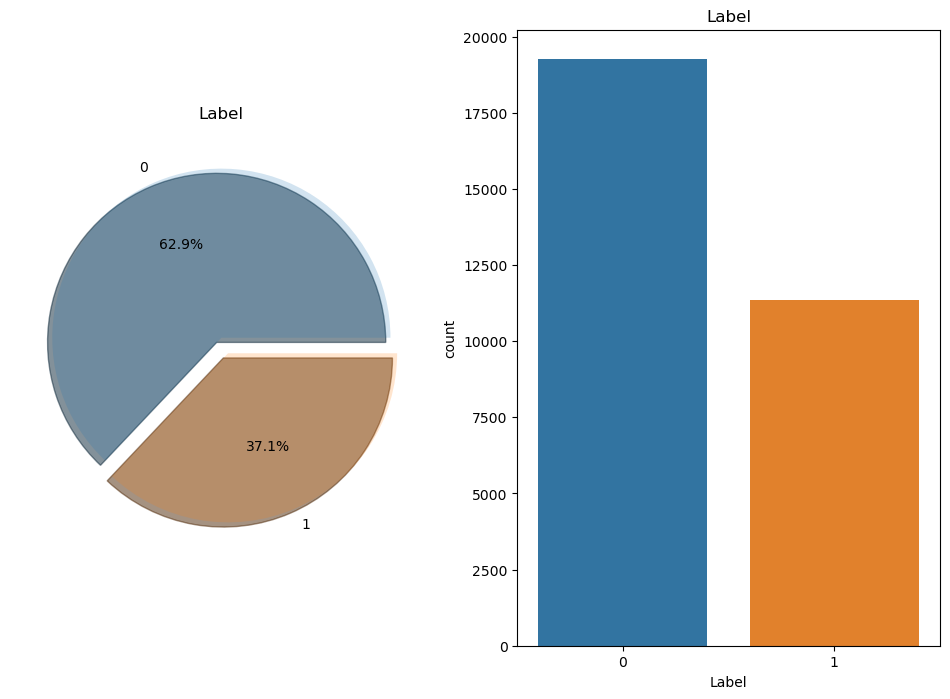

In [19]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(data=df, x='Label', ax=ax[1])
ax[1].set_title('Label')
plt.show()

### Distribution of features

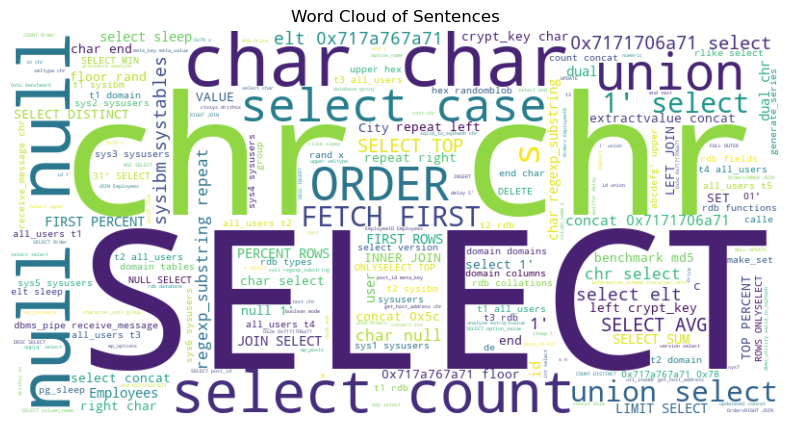

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all sentences into one string
all_text = ' '.join(df['Sentence'])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentences')
plt.show()


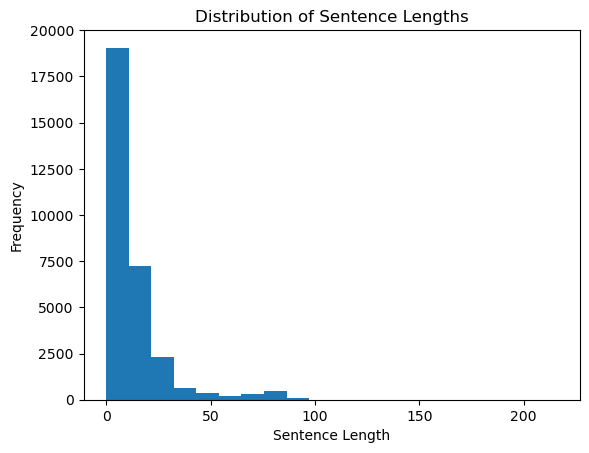

In [28]:
import matplotlib.pyplot as plt

# Calculate sentence lengths and create a histogram
sentence_lengths = df['Sentence'].apply(lambda x: len(x.split()))
plt.hist(sentence_lengths, bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()
